In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('C:/Users/Jeremias/Desktop/Expanded_data_with_more_features.csv',
                 usecols=lambda x: x != 'Unnamed: 0')

### **Exploracion del data set**

---



In [ ]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [ ]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


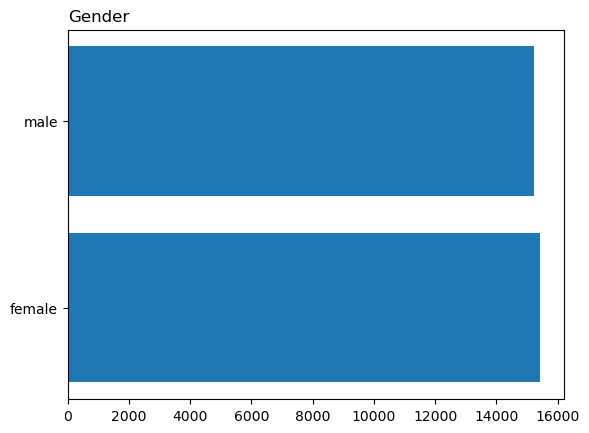

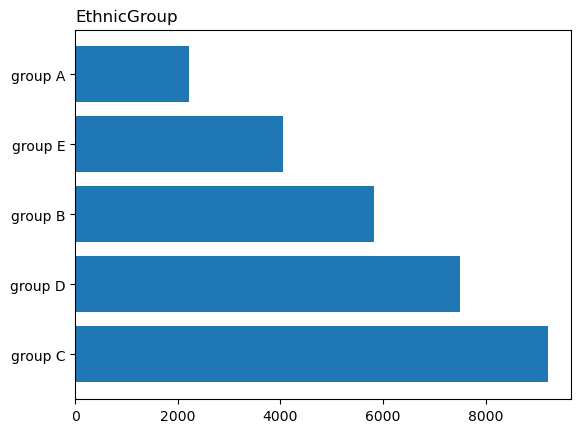

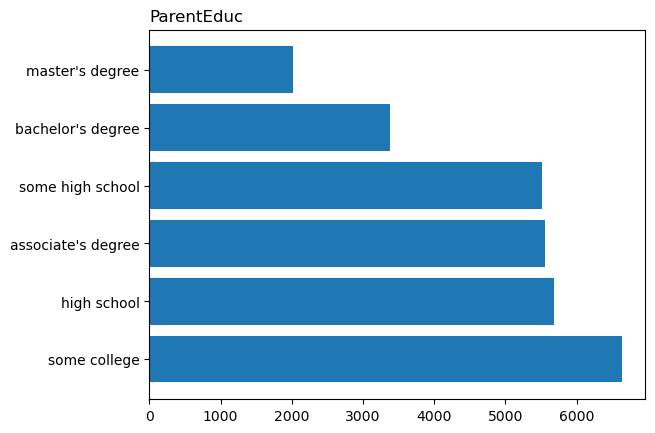

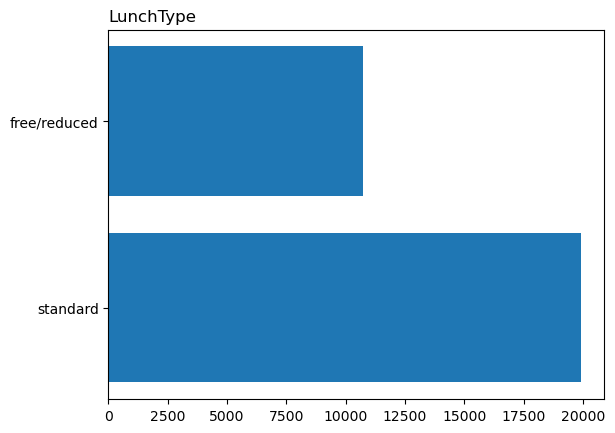

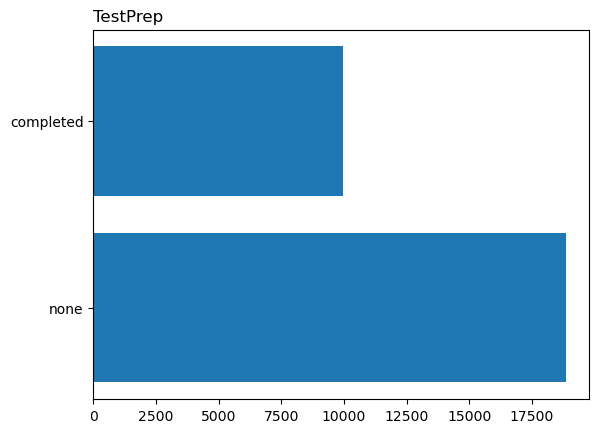

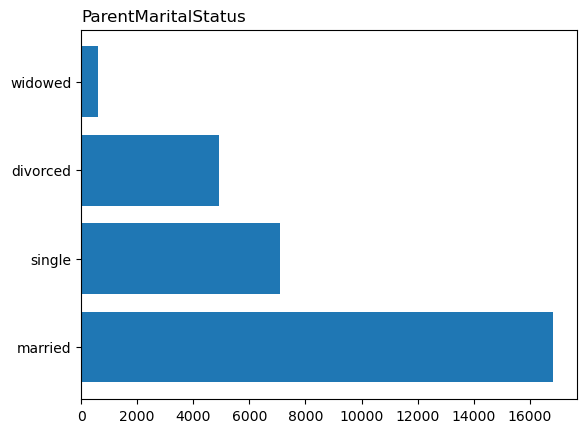

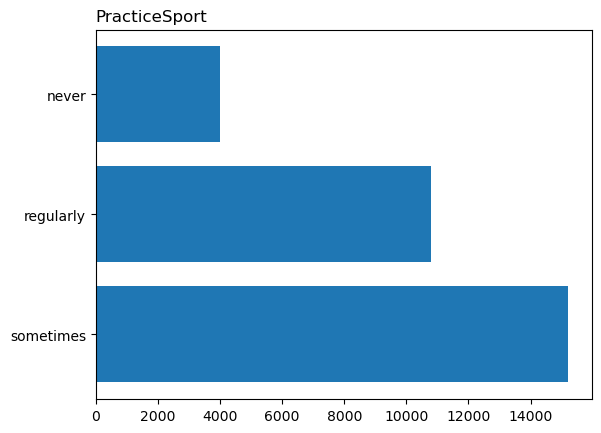

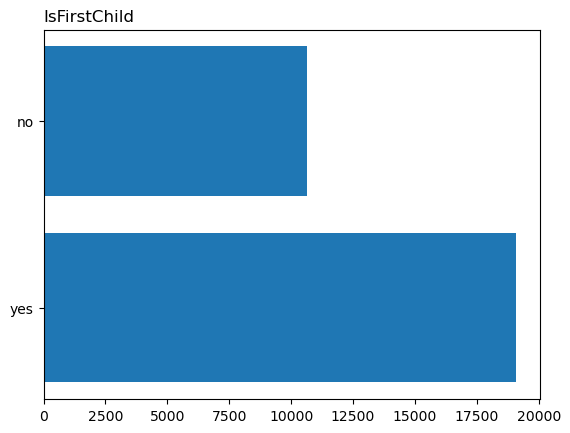

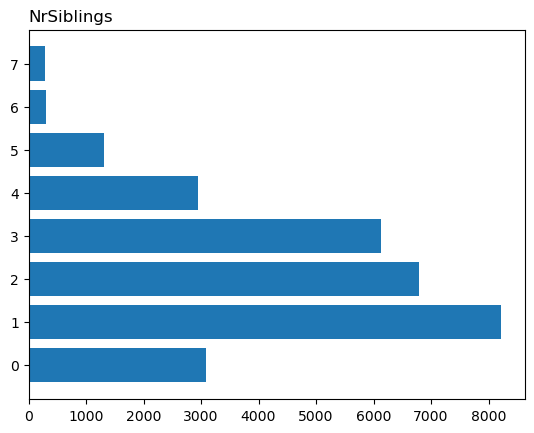

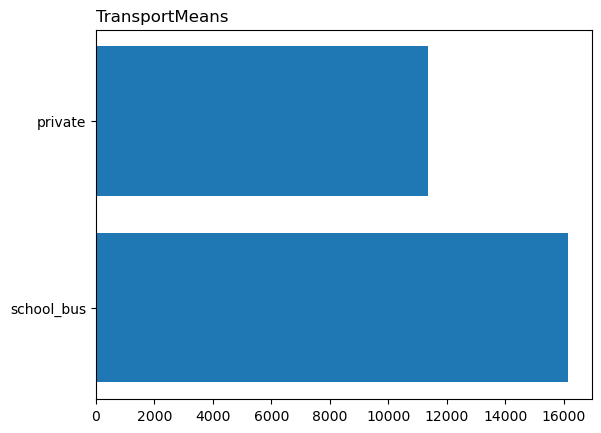

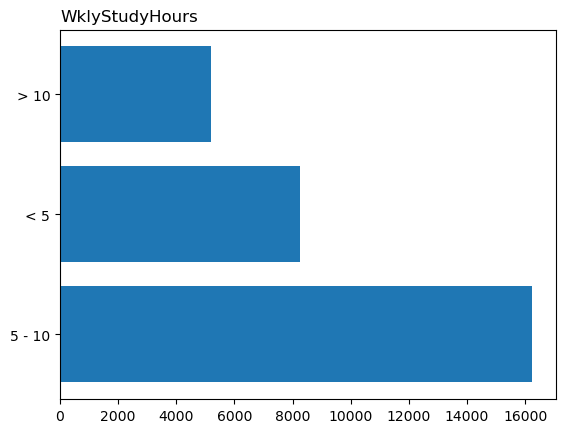

In [ ]:
features_plot = list(df.columns)
for f in features_plot:
  if f == 'MathScore':
    print()
  elif f == 'ReadingScore':
    print()
  elif f == 'WritingScore':
    print()
  else:
      a = df[f].value_counts()
      plt.barh(a.index, a.values)
      plt.title(str(f),
             loc ='left', )
      plt.show()

In [ ]:
features = list(df.columns)
for f in features:
  if f == 'MathScore':
    print()
  elif f == 'ReadingScore':
    print()
  elif f == 'WritingScore':
    print()
  else:
    print(f)
    print(df[f].value_counts())
    print()
    print(df[f].value_counts(normalize = True))
    print("--------------")

Gender
female    15424
male      15217
Name: Gender, dtype: int64

female    0.503378
male      0.496622
Name: Gender, dtype: float64
--------------
EthnicGroup
group C    9212
group D    7503
group B    5826
group E    4041
group A    2219
Name: EthnicGroup, dtype: int64

group C    0.319850
group D    0.260512
group B    0.202285
group E    0.140308
group A    0.077046
Name: EthnicGroup, dtype: float64
--------------
ParentEduc
some college          6633
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
Name: ParentEduc, dtype: int64

some college          0.230344
high school           0.197493
associate's degree    0.192735
some high school      0.191589
bachelor's degree     0.117586
master's degree       0.070253
Name: ParentEduc, dtype: float64
--------------
LunchType
standard        19905
free/reduced    10736
Name: LunchType, dtype: int64

standard        0.64962
free/reduced    0.35038
Name:

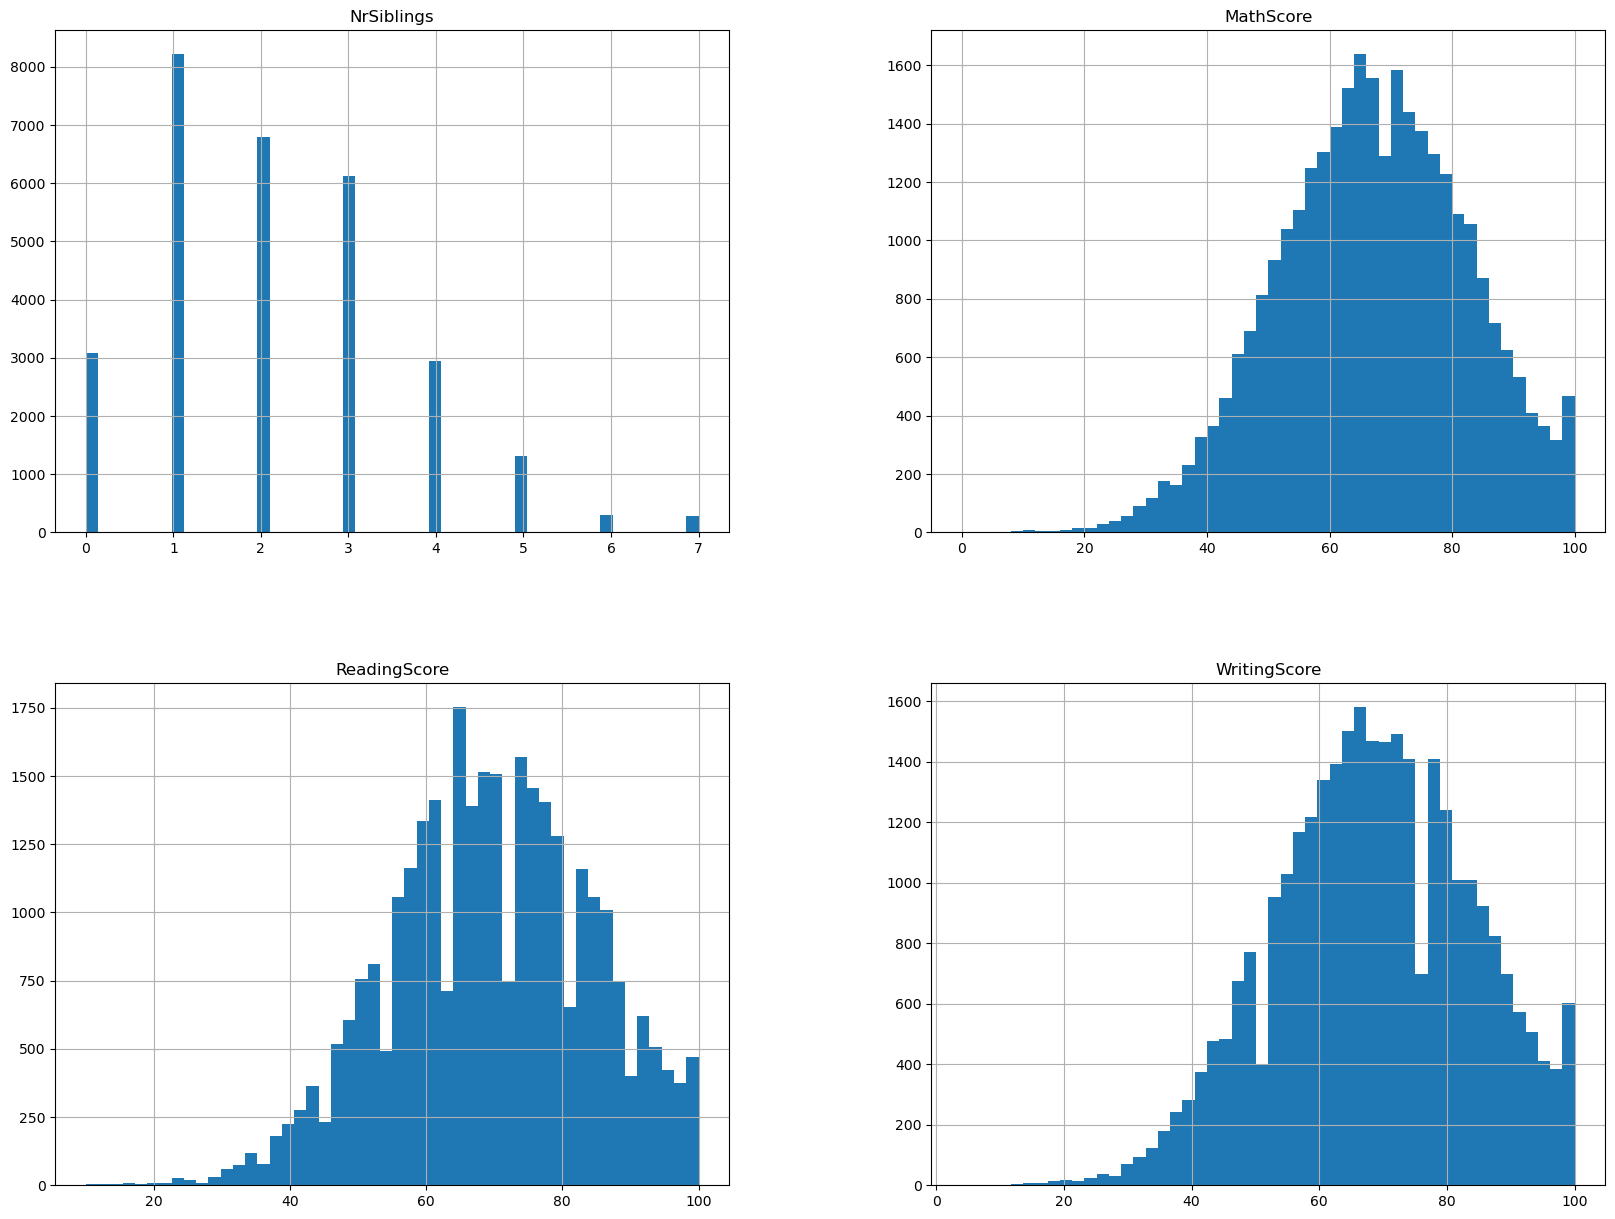

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### **Pre-Procesado**

---



In [ ]:
# probar 'most frecuent'
imputer = SimpleImputer(strategy="most_frequent") # usamos la mediana para reemplazar los valores faltantes
imputer.fit(df)
print(imputer.statistics_)
imp = imputer.transform(df)
X = pd.DataFrame(imp, columns = df.columns) # lo volvemos a convertir en un data frame

['female' 'group C' 'some college' 'standard' 'none' 'married' 'sometimes'
 'yes' 1.0 'school_bus' '5 - 10' 64 65 67]


In [ ]:
X.info() # No hay valores faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               30641 non-null  object
 1   EthnicGroup          30641 non-null  object
 2   ParentEduc           30641 non-null  object
 3   LunchType            30641 non-null  object
 4   TestPrep             30641 non-null  object
 5   ParentMaritalStatus  30641 non-null  object
 6   PracticeSport        30641 non-null  object
 7   IsFirstChild         30641 non-null  object
 8   NrSiblings           30641 non-null  object
 9   TransportMeans       30641 non-null  object
 10  WklyStudyHours       30641 non-null  object
 11  MathScore            30641 non-null  object
 12  ReadingScore         30641 non-null  object
 13  WritingScore         30641 non-null  object
dtypes: object(14)
memory usage: 3.3+ MB


In [ ]:
# Convierto los valores categoricos a numericos

enc = OneHotEncoder(sparse = False)
X = enc.fit_transform(X[['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'TransportMeans', 'WklyStudyHours']])


In [ ]:
X = pd.DataFrame(X, columns = enc.get_feature_names_out()) # Lo vuelvo a convertir en DataFrame

In [ ]:
#X['math_score'] = df.MathScore
#X['reading_score'] = df.ReadingScore
#X['writing_score'] = df.WritingScore

In [ ]:
# Vamos a crear una unica columna:
# Sumamos el puntaje de matematica, de lectura y de escritura y buscamos el promedio entre las 3 notas
# Si ese promedio es 7 o mas, se considerado "Aprobado"(1), caso contrario "Reprobado"(0)

X['Promedio_notas'] = (df.MathScore + df.ReadingScore + df.WritingScore)/3
X['Aprobado'] = np.where(X['Promedio_notas']>=60, 1, 0)

In [ ]:
X.head()

,Gender_female,Gender_male,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,ParentEduc_associate's degree,ParentEduc_bachelor's degree,ParentEduc_high school,...,PracticeSport_sometimes,IsFirstChild_no,IsFirstChild_yes,TransportMeans_private,TransportMeans_school_bus,WklyStudyHours_5 - 10,WklyStudyHours_< 5,WklyStudyHours_> 10,Promedio_notas,Aprobado
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,72.000000,1
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,82.333333,1
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,90.333333,1
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,47.666667,0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,76.333333,1


1    21883
0     8758
Name: Aprobado, dtype: int64


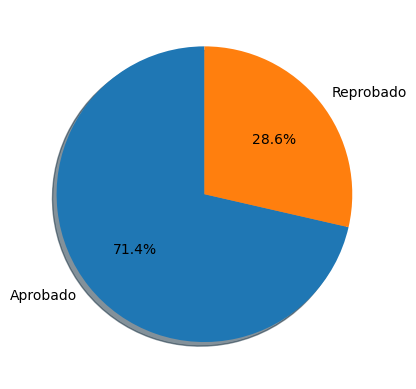

In [ ]:
print(X.Aprobado.value_counts())
fig, ax = plt.subplots()
ax.pie(X.Aprobado.value_counts().values, labels=['Aprobado', 'Reprobado'],shadow=True, startangle=90,autopct='%1.1f%%')
plt.show()

In [ ]:
# Finalmente nos quedamos solo con la columna de Aprobado

X = X.drop(['Promedio_notas'], axis = 1)

In [ ]:
y = X.Aprobado
X = X.drop(['Aprobado'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

### **Modelado (Polinomial)**
----


In [ ]:
pipe = Pipeline([
    ('poli', PolynomialFeatures(1)),
    ('scaler', StandardScaler()),
    ('logi', LogisticRegression(max_iter = 2000, C=0.1))
])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poli', PolynomialFeatures(degree=1)),
                ('scaler', StandardScaler()),
                ('logi', LogisticRegression(C=0.1, max_iter=2000))])

In [ ]:
y_pred = pipe.predict(X_test)

### **Hiper parametros**
----

In [ ]:
param = {
      'poli__degree' : [1, 2, 3],
      'logi__C' : [0.1, 0.01, 0.001, 0.0001]
}

In [ ]:
grid_search = GridSearchCV(pipe, param, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'logi__C': 0.1, 'poli__degree': 1}


### **Evaluacion del modelo**
----

In [ ]:
# Analizando los coeficientes del modelo
columns_feat = np.array(pipe['poli'].get_feature_names_out())
feat = pipe['logi'].coef_[0]
data = pd.DataFrame([feat], columns=columns_feat)
data_ordenado = data.sort_values(by=df.index[0], axis=1,ascending=False)

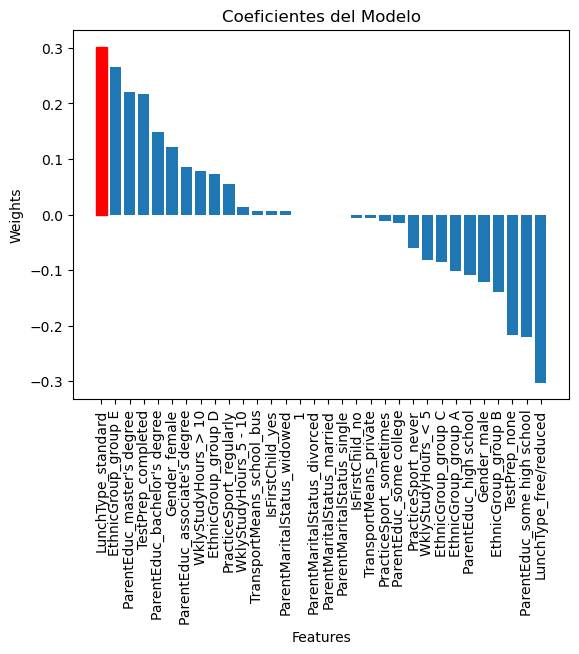

In [ ]:
# El plot de los pesos del modelo
columns = data_ordenado.columns
values = data_ordenado.values.flatten()

bar = plt.bar(columns, values)

plt.xticks(x, columns, rotation='vertical')
highest_index = np.argmax(values)
bar[highest_index].set_color('red') # resaltar la columna con el peso mas grande
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Coeficientes del Modelo')
plt.show()

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f"El accuracy es {acc}")

El accuracy es 0.7425354870288791


In [ ]:
scores = cross_val_score(pipe, X_train, y_train, cv=5)
print(scores)

[0.73648786 0.74464614 0.74459404 0.73378213 0.73357813]


In [ ]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 517 1224]
 [ 354 4034]]


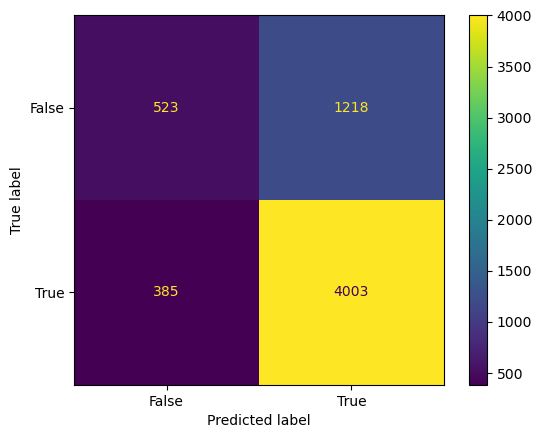

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
TP = confusion_matrixx[1,1]
TN = confusion_matrixx[0,0]
FP = confusion_matrixx[0,1]
FN = confusion_matrixx[1,0]

In [ ]:
# Exactitud

accuracy = (TP+TN)/(TP+TN+FP+FN)
print(accuracy)
print(accuracy==acc) # Solo para chequear

0.7425354870288791
True


In [ ]:
# Precision
pres = TP/(TP+FP)
print(f"La precisión es {pres}")

La precisión es 0.7672118676302777


In [ ]:
# Recall
recall = TP/(TP+FN)
print(f" El recall es {recall}")

 El recall es 0.9193254329990884
